# Contents

- [Regular Expressions](#reg_ex)
- [NLTK](#nltk)  
    - [Sentence Tokenization](#sent_toke)  
    - [Word Tokenization](#word_toke)  
    - [Stopwords](#stp_wrd)  
    - [N-grams](#ngrm)  
    - [Stemming](#stem)
    - [Lemmatization](#lem)
- [TextBlob](#txt_blb)  
    - [Sentiment Analysis](#sent_anal)
- [Vectorization](#vec)  
    - [CountVectorizer](#cnt_vec)  
    - [TFIDF Vectorizer](#tf_vec)  
- [Topic Modeling](#top_mod)  
    - [LDA](#lda)  
    - [NMF](#nmf)  
- [Word2Vec](#w2v)  
- [Word Cloud](#wc)

# Regular Expressions <a name="reg_ex"></a>

In [1]:
import re

## match
Searches for match from begginning of the string

In [2]:
# match result
re.match(r'baloney', 'baloney')

<_sre.SRE_Match object; span=(0, 7), match='baloney'>

In [3]:
# no match
re.match(r'baloney', 'caloney')

In [4]:
re.match(r'baloney', 'mebaloneycheese')

In [5]:
re.match(r'baloney', 'baloneycheese')

<_sre.SRE_Match object; span=(0, 7), match='baloney'>

## search
Searches for match anywhere in the string

In [6]:
# match result
re.search(r'spam', 'spam')

<_sre.SRE_Match object; span=(0, 4), match='spam'>

In [7]:
# no match
re.search(r'spam', 'maam')

In [8]:
re.search(r'spam', 'this is some spam over here')

<_sre.SRE_Match object; span=(13, 17), match='spam'>

## findall
Searches for all matches in the string

In [9]:
# match result
re.findall(r'dynasty', 'this is the first dynasty but whose dynasty?')

['dynasty', 'dynasty']

In [10]:
# no match
re.findall(r'dynasty', 'this is the first but whose?')

[]

## General Searching

In [11]:
sample_text = 'purple alice-b@google.com, blah monkey32 bob@abc.com blah dishwasher'

In [12]:
# search for specific character
re.search(r'b', sample_text).group()

'b'

In [13]:
# search for specific character group
re.search(r'bl', sample_text).group()

'bl'

In [14]:
# search for specific charcter group with wildcard
re.search(r'bl.h', sample_text).group()

'blah'

In [15]:
# search for specific character range
re.search(r'[a-c]', sample_text).group()

'a'

In [16]:
# search for general letter
re.search(r'\w', sample_text).group()

'p'

In [17]:
# search for general letter group
re.search(r'\w+', sample_text).group()

'purple'

In [18]:
# search for general number
re.search(r'\d', sample_text).group()

'3'

In [19]:
re.search(r'\d+', sample_text).group()

'32'

In [20]:
# search for general character group followed by general number group
re.search(r'\S+\d+', sample_text).group()

'monkey32'

### Example: email addresses

In [21]:
sample_text

'purple alice-b@google.com, blah monkey32 bob@abc.com blah dishwasher'

In [22]:
# specify groupings in match result
match = re.search(r'(\w+)@(\w+)', sample_text)

In [23]:
# complete match
match.group()

'b@google'

In [24]:
# first group of match result
match.group(1)

'b'

In [25]:
# second group of match result
match.group(2)

'google'

In [26]:
# findall full matches in string
re.findall(r'[\w.-]+@[\w.-]+', sample_text)

['alice-b@google.com', 'bob@abc.com']

In [27]:
# findall with groupings
match = re.findall(r'([\w.-]+)@([\w.-]+)', sample_text)
match

[('alice-b', 'google.com'), ('bob', 'abc.com')]

In [28]:
# first match result
match[0]

('alice-b', 'google.com')

In [29]:
# first group in first match result
match[0][0]

'alice-b'

## Substitution

In [30]:
sample_text

'purple alice-b@google.com, blah monkey32 bob@abc.com blah dishwasher'

In [31]:
# substitute match with specified item
re.sub('com', 'bomb', sample_text)

'purple alice-b@google.bomb, blah monkey32 bob@abc.bomb blah dishwasher'

# NLTK <a name="nltk"></a>

In [32]:
import nltk

In [33]:
text_sample = "The Cat only grinned when it saw Alice. It looked good-natured, she thought: still it had very long claws and a great many teeth, so she felt that it ought to be treated with respect."

In [34]:
# switch to all lowercase for processing
text_sample = text_sample.lower()

## Sentence Tokenization <a name="sent_toke"></a>
Break document into list of sentences

In [35]:
from nltk import tokenize

In [36]:
# break string document into sentences
sentences = tokenize.sent_tokenize(text_sample)
sentences

['the cat only grinned when it saw alice.',
 'it looked good-natured, she thought: still it had very long claws and a great many teeth, so she felt that it ought to be treated with respect.']

## Word Tokenization <a name="word_toke"></a>
Break sentence into list of words

In [37]:
sentences[0]

'the cat only grinned when it saw alice.'

In [38]:
# break sentence into words
words = tokenize.word_tokenize(sentences[0])
words

['the', 'cat', 'only', 'grinned', 'when', 'it', 'saw', 'alice', '.']

## Stopwords <a name="stp_wrd"></a>
Words like "the", "and", "of", etc.

In [39]:
from nltk.corpus import stopwords

In [40]:
# create list of words to remove from corpus
stop = stopwords.words('english')
stop += ['.', ',', '(', ')', "'", '"']
stop = set(stop)

In [41]:
# remove stopwords
cln_words = [w for w in words if w not in stop]
cln_words[:6]

['cat', 'grinned', 'saw', 'alice']

## N-grams <a name="ngrm"></a>
Adjacent words found in text

In [42]:
from nltk.util import ngrams

In [43]:
words

['the', 'cat', 'only', 'grinned', 'when', 'it', 'saw', 'alice', '.']

In [44]:
# create word pairs
bigrams = ngrams(words, 2)
bigrams

<generator object ngrams at 0x7fcaa53bb410>

In [45]:
for gram in bigrams:
    print(gram)

('the', 'cat')
('cat', 'only')
('only', 'grinned')
('grinned', 'when')
('when', 'it')
('it', 'saw')
('saw', 'alice')
('alice', '.')


In [46]:
# create word trios
trigrams = ngrams(words, 3)

In [47]:
for gram in trigrams:
    print(gram)

('the', 'cat', 'only')
('cat', 'only', 'grinned')
('only', 'grinned', 'when')
('grinned', 'when', 'it')
('when', 'it', 'saw')
('it', 'saw', 'alice')
('saw', 'alice', '.')


## Stemming <a name="stem"></a>
Returns root of words

In [48]:
trim_sample = ['grinned', 'saw', 'alice', 'hearts', 'locate']

In [49]:
# initialize stemmer
stemmer = nltk.stem.porter.PorterStemmer()

In [50]:
# stem each word in words list
for word in trim_sample:
    print(word, '->', stemmer.stem(word))

grinned -> grin
saw -> saw
alice -> alic
hearts -> heart
locate -> locat


## Lemmatization <a name="lem"></a>
Similar to stemming but less aggressive

In [51]:
# initialize lemma
lemma=nltk.stem.WordNetLemmatizer()

In [52]:
# lemmatize each word in words list
for word in trim_sample:
    print(word, '->', lemma.lemmatize(word))

grinned -> grinned
saw -> saw
alice -> alice
hearts -> heart
locate -> locate


# Spacy

In [53]:
import spacy

In [54]:
# load english parser
nlp = spacy.load('en')

In [55]:
phrase = sentences[0]

In [56]:
# parse words
for word in nlp(phrase):
    print(word)

the
cat
only
grinned
when
it
saw
alice
.


In [57]:
# return simplified parts of speech
for word in nlp(phrase):
    print(word.pos_)

DET
NOUN
ADV
VERB
ADV
PRON
VERB
NOUN
PUNCT


In [58]:
# return complex parts of speech
for word in nlp(phrase):
    print(word.tag_)

DT
NN
RB
VBD
WRB
PRP
VBD
NN
.


In [59]:
# visualize sentence structure
spacy.displacy.render(nlp(phrase), style='dep')

In [60]:
# verbose sentence structure
for word in nlp(phrase):
    print (word.text, word.tag_, word.head.text, word.dep_)

the DT cat det
cat NN grinned nsubj
only RB grinned advmod
grinned VBD grinned ROOT
when WRB saw advmod
it PRP saw nsubj
saw VBD grinned advcl
alice NN saw dobj
. . grinned punct


# TextBlob <a name="txt_blb"></a>

In [61]:
from textblob import TextBlob

In [62]:
# break input into sentences
TextBlob(text_sample).sentences

[Sentence("the cat only grinned when it saw alice."),
 Sentence("it looked good-natured, she thought: still it had very long claws and a great many teeth, so she felt that it ought to be treated with respect.")]

In [63]:
# break input into words
TextBlob(sentences[0]).words

WordList(['the', 'cat', 'only', 'grinned', 'when', 'it', 'saw', 'alice'])

In [64]:
# retrieve word counts
TextBlob(sentences[0]).word_counts

defaultdict(int,
            {'the': 1,
             'cat': 1,
             'only': 1,
             'grinned': 1,
             'when': 1,
             'it': 1,
             'saw': 1,
             'alice': 1})

## Sentiment Analysis <a name="sent_anal"></a> 
- Polarity scale: -1 (negative) to 1 (positive)  
- Subjectivity scale: 0 (very objective) to 1 (very subjective)

In [65]:
# positive or negative polarity for document
TextBlob(text_sample).sentiment

Sentiment(polarity=0.30875, subjectivity=0.6925)

In [66]:
# positive or negative polarity for sentence
TextBlob(sentences[0]).sentiment

Sentiment(polarity=0.0, subjectivity=1.0)

# Document Data

In [67]:
from nltk.corpus import movie_reviews

In [68]:
# grab range of filenames from corpus
fileids = movie_reviews.fileids('pos')[:100]
# create list of words for each file
doc_words = [movie_reviews.words(fileid) for fileid in fileids]
# create list of sentences by combining words back into sentences for each file
pos_docs = [' '.join(words) for words in doc_words]

In [69]:
fileids = movie_reviews.fileids('neg')[:100]
doc_words = [movie_reviews.words(fileid) for fileid in fileids]
neg_docs = [' '.join(words) for words in doc_words]

In [70]:
# combine into one variable
documents = pos_docs + neg_docs

# Vectorization <a name="vec"></a>
Bag of Words (BOW)

In [71]:
import pandas as pd

## CountVectorizer <a name="cnt_vec"></a>
Returns word counts per document

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

In [73]:
# create instance of CountVectorizer
cv_vectorizer = CountVectorizer(stop_words='english', # remove inconsequential words
                             max_df=0.95, # ignore most frequent words (corpus-specific stopwords)
                             min_df=0.05 # ignore least frequent words (irrelevant words)
                            )

In [74]:
# learn vocabulary from input documents
cv_vectorizer.fit(documents)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=None, min_df=0.05,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [75]:
# transform documents into document-term matrix
X = cv_vectorizer.transform(documents)
X

<200x949 sparse matrix of type '<class 'numpy.int64'>'
	with 21677 stored elements in Compressed Sparse Row format>

In [76]:
# return matrix of term counts per document
X.toarray()

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [77]:
# return tokens from documents
cv_vectorizer.get_feature_names()[:20]

['10',
 '20',
 '30',
 'ability',
 'able',
 'absolutely',
 'academy',
 'act',
 'acting',
 'action',
 'actions',
 'actor',
 'actors',
 'acts',
 'actual',
 'actually',
 'adaptation',
 'add',
 'addition',
 'adds']

In [78]:
# create dataframe of document-term matrix
cv_df = pd.DataFrame(X.toarray(), columns=[cv_vectorizer.get_feature_names()])
cv_df.head()

,10,20,30,ability,able,absolutely,academy,act,acting,action,...,write,writer,writing,written,wrong,year,years,yes,york,young
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,1,5,1,0,...,0,0,0,0,0,0,1,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Add lemmatizer

In [79]:
import nltk
from nltk import tokenize

In [80]:
lemma=nltk.stem.WordNetLemmatizer()
# lemmatize function
def lemma_func(document):
    return [lemma.lemmatize(word) for word in tokenize.word_tokenize(document)]

In [81]:
# add lemmatizer to vectorizer
cv_vectorizer = CountVectorizer(stop_words='english',
                             max_df=0.95,
                             min_df=0.05,
                             tokenizer=lemma_func
                            )

In [82]:
X_lem = cv_vectorizer.fit_transform(documents)

In [83]:
cv_df_lem = pd.DataFrame(X_lem.toarray(), columns=[cv_vectorizer.get_feature_names()])
cv_df_lem.head()

,!,$,&,(,),*,--,/,1,10,...,wouldn,write,writer,writing,written,wrong,year,yes,york,young
0,0,0,0,18,18,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,10,10,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,2,0,0,0
3,0,0,0,10,10,0,2,0,1,0,...,0,0,0,0,0,0,1,0,1,1
4,1,0,0,4,4,0,3,1,0,0,...,0,0,0,0,0,0,0,0,1,0


## TFIDF Vectorizer <a name="tf_vec"></a>
Returns weights of words per document normalized against occurence in entire corpus

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [85]:
# create instance of TFIDF vectorizer
tf_vectorizer = TfidfVectorizer(stop_words='english', # remove inconsequential words
                             max_df=0.95, # ignore most frequent words (corpus-specific stopwords)
                             min_df=0.05 # ignore least frequent words (irrelevant words)
                            )

In [86]:
# learn vocabulary from input documents
tf_vectorizer.fit(documents)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=None, min_df=0.05,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [87]:
# transform documents into document-term matrix
X = tf_vectorizer.transform(documents)
X

<200x949 sparse matrix of type '<class 'numpy.float64'>'
	with 21677 stored elements in Compressed Sparse Row format>

In [88]:
# return matrix of normalized term counts
X.toarray()

array([[0.        , 0.        , 0.08169609, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [89]:
# return tokens from documents
tf_vectorizer.get_feature_names()[:20]

['10',
 '20',
 '30',
 'ability',
 'able',
 'absolutely',
 'academy',
 'act',
 'acting',
 'action',
 'actions',
 'actor',
 'actors',
 'acts',
 'actual',
 'actually',
 'adaptation',
 'add',
 'addition',
 'adds']

In [90]:
# create dataframe of document-term matrix
tf_df = pd.DataFrame(X.toarray(), columns=[tf_vectorizer.get_feature_names()])
tf_df.head()

,10,20,30,ability,able,absolutely,academy,act,acting,action,...,write,writer,writing,written,wrong,year,years,yes,york,young
0,0.0,0.0,0.081696,0.0,0.0,0.000000,0.000000,0.000000,0.050323,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.042467,0.000000,0.0,0.000000,0.000000
2,0.0,0.0,0.000000,0.0,0.0,0.106398,0.000000,0.000000,0.069607,0.0,...,0.0,0.0,0.0,0.0,0.0,0.142731,0.000000,0.0,0.000000,0.000000
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.067824,0.309602,0.042673,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.038906,0.0,0.065228,0.040692
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.085248,0.000000


### Add lemmatizer

In [91]:
import nltk
from nltk import tokenize

In [92]:
lemma=nltk.stem.WordNetLemmatizer()
# lemmatize function
def lemma_func(document):
    return [lemma.lemmatize(word) for word in tokenize.word_tokenize(document)]

In [93]:
# add lemmatizer to vectorizer
tf_vectorizer = TfidfVectorizer(stop_words='english',
                             max_df=0.95,
                             min_df=0.05,
                             tokenizer=lemma_func
                            )

In [94]:
X_lem = tf_vectorizer.fit_transform(documents)

In [95]:
tf_df_lem = pd.DataFrame(X_lem.toarray(), columns=[tf_vectorizer.get_feature_names()])
tf_df_lem.head()

,!,$,&,(,),*,--,/,1,10,...,wouldn,write,writer,writing,written,wrong,year,yes,york,young
0,0.000000,0.0,0.0,0.324615,0.324615,0.0,0.000000,0.080978,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
1,0.000000,0.0,0.0,0.178666,0.178666,0.0,0.000000,0.040113,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.029770,0.0,0.000000,0.000000
2,0.000000,0.0,0.0,0.030684,0.030684,0.0,0.000000,0.068889,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.102252,0.0,0.000000,0.000000
3,0.000000,0.0,0.0,0.144143,0.144143,0.0,0.057687,0.000000,0.045836,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.024018,0.0,0.049062,0.030607
4,0.043287,0.0,0.0,0.090245,0.090245,0.0,0.135437,0.050653,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.076792,0.000000


# Topic Modeling <a name="top_mod"></a>

## LDA <a name="lda"></a>

In [96]:
from sklearn.decomposition import LatentDirichletAllocation

In [97]:
# create instance of model, input number of topics to output
lda = LatentDirichletAllocation(n_components=5)

In [98]:
# fit model to vectorized data
lda.fit(cv_df)

/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=5, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [99]:
# documents x token weights
lda.transform(cv_df)[:10]

array([[9.91501411e-01, 4.80297823e-03, 1.23022778e-03, 1.23126909e-03,
        1.23411388e-03],
       [9.95157393e-01, 1.23313295e-03, 1.20060010e-03, 1.20433066e-03,
        1.20454324e-03],
       [9.92965974e-01, 1.79356335e-03, 1.74373272e-03, 1.74839645e-03,
        1.74833355e-03],
       [9.96486027e-01, 8.90473011e-04, 8.71870524e-04, 8.73486201e-04,
        8.78143589e-04],
       [4.09816572e-01, 5.85878569e-01, 1.43241785e-03, 1.43513114e-03,
        1.43731014e-03],
       [9.95540077e-01, 1.12775345e-03, 1.10796198e-03, 1.11009155e-03,
        1.11411622e-03],
       [9.96441758e-01, 9.02934011e-04, 8.83399417e-04, 8.84263677e-04,
        8.87644662e-04],
       [9.93926908e-01, 1.54058951e-03, 1.50751634e-03, 1.51058574e-03,
        1.51440079e-03],
       [9.85068896e-01, 3.78129843e-03, 3.71407102e-03, 3.71457996e-03,
        3.72115472e-03],
       [8.10837422e-01, 2.16433646e-03, 2.11021893e-03, 2.11312045e-03,
        1.82774902e-01]])

In [100]:
# topics x token weights
lda.components_

array([[ 3.71462435,  8.33807222,  9.81264919, ..., 15.29525719,
        14.61856076, 66.05094858],
       [32.77363991,  3.52184746,  0.29622365, ...,  6.9880051 ,
         1.61454788, 10.6100858 ],
       [ 0.30229222,  0.25426211,  0.27359432, ...,  0.24215327,
         0.27475786,  0.41557642],
       [ 0.28561633,  0.54889721,  0.27180227, ...,  0.27348942,
         0.27822568,  0.53140245],
       [ 0.2612331 ,  0.27999296,  0.28024846, ...,  0.33344427,
         0.25377553,  0.41366442]])

In [101]:
# tokens from vectorizer
cv_vectorizer.get_feature_names()[:20]

['!',
 '$',
 '&',
 '(',
 ')',
 '*',
 '--',
 '/',
 '1',
 '10',
 '2',
 '20',
 '3',
 '30',
 '4',
 '5',
 '90',
 ':',
 ';',
 '?']

In [102]:
# return index of top five tokens in first topic
lda.components_[0].argsort()[::-1][:5]

array([297, 539, 466, 344, 783])

In [103]:
# return top five tokens in first topic
[cv_vectorizer.get_feature_names()[i] for i in lda.components_[0].argsort()[::-1][:5]]

['excellent', 'material', 'kid', 'flat', 'son']

In [104]:
# function to print top words of topic model
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [105]:
print_top_words(lda, cv_vectorizer.get_feature_names(), 5)


Topic #0:excellent material kid flat son

Topic #1:material excellent kid human previous

Topic #2:material excellent kid human kevin

Topic #3:husband got ii effort theater

Topic #4:liked excellent follow public baby


## NMF <a name="nmf"></a>

In [106]:
from sklearn.decomposition import NMF

In [107]:
# create instance of model, input number of topics to output
nmf = NMF(n_components=5)

In [108]:
# fit model to vectorized data
nmf.fit(tf_df)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=5, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [109]:
# documents x topic weights
nmf.transform(tf_df)[:10]

array([[0.0851598 , 0.11045351, 0.02823067, 0.04155233, 0.08875512],
       [0.03834375, 0.05014077, 0.14340199, 0.02738292, 0.04282241],
       [0.        , 0.15348201, 0.1710752 , 0.03246468, 0.        ],
       [0.09977374, 0.0686053 , 0.17979891, 0.        , 0.07182853],
       [0.00732272, 0.22464304, 0.        , 0.        , 0.15082318],
       [0.03931246, 0.00180219, 0.29228452, 0.        , 0.02302631],
       [0.17039706, 0.0192213 , 0.08385073, 0.        , 0.10259823],
       [0.11019092, 0.08219807, 0.18315993, 0.        , 0.        ],
       [0.09437333, 0.        , 0.12467642, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.42395944]])

In [110]:
# topics x token weights
nmf.components_

array([[0.00000000e+00, 2.00290619e-04, 9.38978207e-03, ...,
        3.64384780e-02, 1.13817562e-02, 2.37117594e-02],
       [0.00000000e+00, 1.58330227e-02, 5.39006698e-03, ...,
        3.60696222e-02, 1.15045167e-02, 8.23428550e-03],
       [0.00000000e+00, 9.22811549e-03, 2.05499669e-02, ...,
        6.13169520e-03, 1.78796007e-02, 1.76563345e-01],
       [6.55738341e-01, 2.15946670e-02, 0.00000000e+00, ...,
        2.43160844e-02, 0.00000000e+00, 8.10549306e-02],
       [0.00000000e+00, 3.06400206e-02, 3.73949895e-02, ...,
        1.31979976e-03, 5.80989319e-02, 1.42238920e-02]])

In [111]:
# tokens from vectorizer
tf_vectorizer.get_feature_names()[:20]

['!',
 '$',
 '&',
 '(',
 ')',
 '*',
 '--',
 '/',
 '1',
 '10',
 '2',
 '20',
 '3',
 '30',
 '4',
 '5',
 '90',
 ':',
 ';',
 '?']

In [112]:
# function to print top words of topic model
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [113]:
print_top_words(nmf, tf_vectorizer.get_feature_names(), 5)


Topic #0:excellent bringing son brings kid

Topic #1:material kid previous incredible human

Topic #2:kevin effort life english williams

Topic #3:! meet appears excellent human

Topic #4:10 liked experience alien release


# Word2Vec <a name="w2v"></a>
Find similarity between words based on given corpus

In [114]:
import gensim

## Preprocess

In [115]:
from nltk.corpus import stopwords
from nltk import tokenize

In [116]:
stoplist = stopwords.words('english')
stoplist += ['.', ',', '(', ')', "'", '"']
stoplist = set(stop)

In [117]:
# create word list per document while removing stopwords
doc_words = [[word for word in tokenize.word_tokenize(document.lower()) if word not in stoplist]
         for document in documents]

## Model

### Continuous Bag of Words (CBOW)
Predicts word from context

In [118]:
# initialize model
model = gensim.models.Word2Vec(doc_words, size=100, window=5, min_count=1, workers=2)

In [119]:
# find similar words in corpus
model.wv.most_similar(positive='director')

/home/kevcon/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('-', 0.9999414086341858),
 ('film', 0.9999388456344604),
 (':', 0.9999312162399292),
 ('good', 0.9999305009841919),
 ('--', 0.9999294281005859),
 ('one', 0.9999285936355591),
 ('time', 0.9999244213104248),
 ('also', 0.9999239444732666),
 ('two', 0.9999201893806458),
 ('like', 0.9999200701713562)]

In [120]:
# rate similarity between two words in corpus
model.wv.similarity(w1='director', w2='actor')

/home/kevcon/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.9998332

### skip-gram
Predicts context from word

In [121]:
# initialize model
model = gensim.models.Word2Vec(doc_words, size=100, window=10, min_count=1, workers=2, sg=1)

In [122]:
# find similar words in corpus
model.wv.most_similar(positive='director')

/home/kevcon/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('writer', 0.9964767694473267),
 ('9', 0.996321439743042),
 ('5', 0.9933160543441772),
 ('6', 0.9928815364837646),
 ('8', 0.9926654696464539),
 ('salvation', 0.9920167922973633),
 ('crow', 0.9906859993934631),
 ('4', 0.9887235760688782),
 ('girlfight', 0.9866352677345276),
 ('7', 0.9850453734397888)]

In [123]:
# rate similarity between two words in corpus
model.wv.similarity(w1='director', w2='actor')

/home/kevcon/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.9576361

# Word Cloud <a name="wc"></a>
Visualize prominent words in document

In [124]:
import matplotlib.pyplot as plt

In [125]:
from wordcloud import WordCloud

In [126]:
# create wordcloud object
wc = WordCloud()
wc.generate(documents[0])

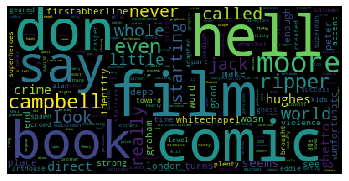

In [127]:
# plot with imshow
plt.imshow(wc)
plt.axis('off');

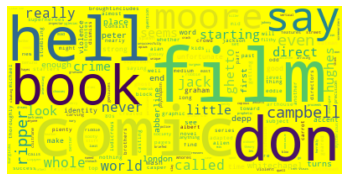

In [128]:
# change background color
wc = WordCloud(background_color='yellow').generate(documents[0])
# set interpolation parameter to smooth text images
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

## Word Cloud with Image

In [129]:
import numpy as np

In [130]:
from PIL import Image

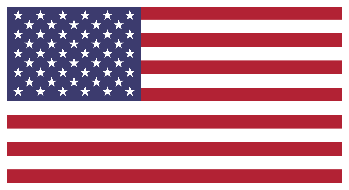

In [131]:
# read in image file
mask = np.array(Image.open('data/usa.png'))
plt.imshow(mask)
plt.axis('off');

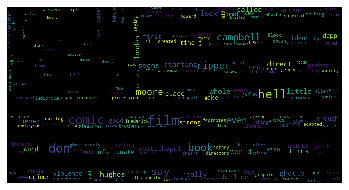

In [132]:
# apply image mask to wordcloud object
wc = WordCloud(mask=mask).generate(documents[0])
plt.imshow(wc)
plt.axis('off');

### Match Image Color

In [133]:
from wordcloud import ImageColorGenerator

In [134]:
# read in image coloring
image_colors = ImageColorGenerator(mask)

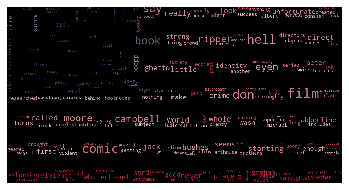

In [135]:
wc = WordCloud(mask=mask).generate(documents[0])
# apply image coloring to text rendering
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis('off');

In [136]:
# save image to file
wc.to_file('data/wc_image.png')